<a href="https://colab.research.google.com/github/som-pat/localization/blob/main/Bounding_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [13]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot as plt
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

In [14]:
pre_train_vgg = tf.keras.applications.vgg16.VGG16(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet'
)

In [15]:
x = Flatten()(pre_train_vgg.output)
x = Dense(4,activation='sigmoid')(x)
model = Model(pre_train_vgg.input,x)

In [16]:
def image_generator(batch_size=64):
  while True:
    for _ in range(50):
      x = np.zeros((batch_size,100,100,3))
      y = np.zeros((batch_size,4))

      for i in range(batch_size):
        row0 = np.random.randint(90)
        row1 = np.random.randint(row0,100)
        col0 = np.random.randint(90)
        col1 = np.random.randint(col0,100)
        x[i,row0:row1,col0:col1,:] = 1
        y[i,0] = row0/100
        y[i,1] = col0/100
        y[i,2] = (row1-row0)/100
        y[i,3] = (col1-col0)/100

      yield x,y


In [17]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001))

In [18]:
model.fit(
    image_generator(),
    steps_per_epoch=50,
    epochs=5,
    verbose=1
)

Epoch 1/5
50/50 [==============================] - 1278s 26s/step - loss: 0.6658
Epoch 2/5
50/50 [==============================] - 1198s 24s/step - loss: 0.5184
Epoch 3/5
50/50 [==============================] - 1200s 24s/step - loss: 0.5101
Epoch 4/5
50/50 [==============================] - 1202s 24s/step - loss: 0.5066
Epoch 5/5
50/50 [==============================] - 1200s 24s/step - loss: 0.5046


In [24]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
def making_rect_predictions():
  x = np.zeros((100,100,3))
  row0 = np.random.randint(90)
  row1 = np.random.randint(row0,100)
  col0 = np.random.randint(90)
  col1 = np.random.randint(col0,100)
  x[row0:row1,col0:col1,:] = 1

  print(row0,row1,col0,col1)
  X = np.expand_dims(x,axis=0)
  p = model.predict(X)[0]

  fig,ax = plt.subplots(1)
  ax.imshow(x)
  rect=Rectangle((p[1]*100,p[0]*100),p[3]*100,p[2]*100,
                 linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.show()





13 94 22 98
1/1 [==============================] - 0s 196ms/step


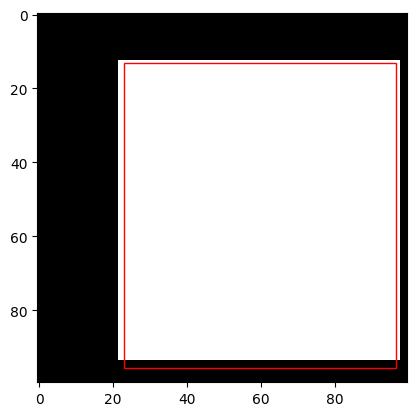

In [30]:
making_rect_predictions()